<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# EDA Walkthrough

_Authors: Kiefer Katovich (SF), David Yerrington (SF), Riley Dallas (AUS)_

---

The dataset for today's lesson (`Heart.csv`) comes from the book, [An Introduction to Statistical Learning (ISLR)](http://www-bcf.usc.edu/~gareth/ISL/). It's comprised of diagnostic measurements for 303 patients to determine whether or not they have heart disease (the `AHD` column).

Though in many if not most cases the EDA procedure will be considerably more involved, this should give you an idea of the basic workflow a data scientist would use when working with a new dataset.

### Learning Objectives

- Quickly describe a dataset, including data types, missing values and basic descriptive statistics
- Rename columns (series) in a DataFrame
- Visualize data distributions with box plots
- Calculate and visualize correlation

In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Load the data

---

Import the CSV into a pandas DataFrame.

In [6]:
file_path = '../datasets/Heart.csv'

In [13]:
# A:
df = pd.read_csv(file_path)

## Describe the basic format of the data and the columns

---

Use the `.head()` method (and optionally pass in an integer for the number of rows you want to see) to get a glimpse of your dataset. This is a good initial step to get a feel for what is in the CSV and what problems may be present.

The `.dtypes` attribute tells you the data type for each of your columns.

In [8]:
# Print out the first 8 rows:
df.head(8)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0
5,6,56,1,nontypical,120,236,0,0,178,0,0.8,1,0.0,normal,0
6,7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,1
7,8,57,0,asymptomatic,120,354,0,0,163,1,0.6,1,0.0,normal,0


In [15]:
# Look at the dtypes of the columns:
df.dtypes

Age           object
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

## Drop unwanted columns

---

It looks like `Unnamed: 0` is an index. This is redundant, since `pandas` automatically creates an index for us (the bold numbers to the left of the DataFrame).

The `.drop()` method can be used to get rid of a column like so:

```python
df.drop(columns=['list', 'columns', 'to', 'drop'], inplace=True)
```

The `inplace=True` parameter makes our change permanent.

In [6]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
df['Unnamed: 0'][:20]


0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
Name: Unnamed: 0, dtype: int64

In [14]:
# Remove the unneccesary column:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


## Clean corrupted column

---

From the previous step, we noticed the `Age` column was interpreted as a string, even though the values are integers.

It is pretty common to have numeric columns represented as strings in your data if some of the observations are corrupted. It is important to always check the data types of your columns.

**What is causing the `Age` column to be encoded as a string?**

In [8]:
df.Age.sort_values(ascending=False)

198     ?
274     ?
26      ?
121     ?
207     ?
92      ?
249     ?
214     ?
62      ?
161    77
257    76
233    74
273    71
103    71
42     71
170    70
136    70
155    70
258    70
189    69
196    69
30     69
159    68
299    68
83     68
194    68
2      67
152    67
71     67
195    67
       ..
186    42
182    42
220    41
212    41
241    41
147    41
4      41
115    41
295    41
57     41
50     41
240    41
268    40
41     40
29     40
277    39
109    39
82     39
222    39
211    38
302    38
210    37
3      37
168    35
138    35
117    35
283    35
225    34
101    34
132    29
Name: Age, Length: 303, dtype: object

In the cell below, replace all "?" cells with `np.nan`.

In [16]:
df.Age = df.Age.map(lambda age: np.nan if age == '?' else float(age))
df.dtypes

Age          float64
Sex            int64
ChestPain     object
RestBP         int64
Chol           int64
Fbs            int64
RestECG        int64
MaxHR          int64
ExAng          int64
Oldpeak      float64
Slope          int64
Ca           float64
Thal          object
AHD            int64
dtype: object

## Determine how many observations are missing

---

Having replaced the question marks with `np.nan` values, we know that there are some missing observations for the `Age` column. 

When we start to build models with data, null values in observations are (almost) never allowed. It is important to always see how many observations are missing for each column.

We can count the null values for each column like so:

```python
df.isnull().sum()
```

The `.isull()` method will convert the columns to `True` and `False` values.

The `.sum()` method will then sum these boolean columns, and the total number of null values per column will be returned.

In [17]:
df.isnull().sum()

Age          9
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

**Drop the null values.** 

In this case, lets keep it simple and just drop the rows from the dataset that contain null values. If a column has a ton of null values it often makes more sense to drop the column entirely instead of the rows with null values.

The `.dropna()` function will drop any rows that have _**ANY**_ null values for you.  Use this carefully as you could drop many more rows than expected.

In [18]:
df.shape

(303, 14)

In [19]:
df.dropna(inplace=True)

In [20]:
df.shape

(288, 14)

## Make the column names more descriptive
---

One minor annoyance is that our column names are not at all intuitive. 

Let's rename them! 

There are two popular methods to renaming columns.

1. Using a _dictionary substitution_, which is very useful if you only want to rename a few columns. 
2. Using a _list replacement_, which is quicker than writing out a dictionary, but requires a full list of names.

We'll explore both options in the cells below.

In [13]:
# Dictionary Method
new_columns_dict = {
    'Age': 'age',
    'Sex': 'sex_male',
    'ChestPain': 'chest_pain',
    'RestBP': 'resting_blood_pressure',
    'Chol': 'cholesterol',
    'Fbs': 'fasting_blood_sugar',
    'RestECG': 'resting_ecg',
    'MaxHR': 'max_heart_rate',
    'ExAng': 'exercise_induced_angina',
    'Oldpeak': 'old_peak',
    'Slope': 'slope',
    'Ca': 'ca',
    'Thal': 'thallium_stress_test',
    'AHD': 'has_heart_disease',
}

df.rename(columns=new_columns_dict, inplace=True)

In [14]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,thallium_stress_test,has_heart_disease
0,63.0,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,0
1,67.0,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,1
2,67.0,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,1
3,37.0,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,0
4,41.0,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,0


In [ ]:
# List Replacement Method
new_columns_list = [
    'age',
    'sex_male',
    'chest_pain',
    'resting_blood_pressure',
    'cholesterol',
    'fasting_blood_sugar',
    'resting_ecg',
    'max_heart_rate',
    'exercise_induced_angina',
    'old_peak',
    'slope',
    'ca',
    'thallium_stress_test',
    'has_heart_disease',
]

# df.columns = new_columns_list

## Describe the summary statistics for the columns
---

<img src="https://snag.gy/07JFa5.jpg" width="350">

---

The `.describe()` function gives summary statistics for each of your columns. What are some, if any, oddities you notice about the columns based on this output?

In [15]:
df.describe()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.00000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,54.461806,0.677083,131.760417,247.163194,0.145833,1.00000,149.576389,0.329861,1.051042,1.607639,0.656250,0.458333
std,9.138039,0.468405,17.924393,51.425510,0.353553,0.99476,23.152601,0.470981,1.163528,0.620956,0.916304,0.499128
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.00000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,47.000000,0.000000,120.000000,211.750000,0.000000,0.00000,133.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,130.000000,243.000000,0.000000,1.00000,152.500000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,276.250000,0.000000,2.00000,166.000000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.00000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


You can also use `.groupby()` + `.describe()` for cohort analysis

In [17]:
df.groupby('has_heart_disease').mean().T

has_heart_disease,0,1
age,52.506410,56.772727
sex,0.557692,0.818182
resting_blood_pressure,129.294872,134.674242
cholesterol,243.179487,251.871212
fasting_blood_sugar,0.141026,0.151515
resting_ecg,0.852564,1.174242
max_heart_rate,158.673077,138.825758
exercise_induced_angina,0.147436,0.545455
old_peak,0.595513,1.589394
slope,1.416667,1.833333


## Plot variables with potential outliers using boxplots.

---

Here we will use the seaborn package to plot boxplots of the variables we have identified as potentially having outliers.

Some notes on seaborn's boxplot keyword argument options:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent

There are more keyword arguments available but those are most relevant for now.

_If you want to check out more, place your cursor in the `boxplot` argument bracket and press `shift+tab` (Press four times repeatedly to bring up detailed documentation)._
    

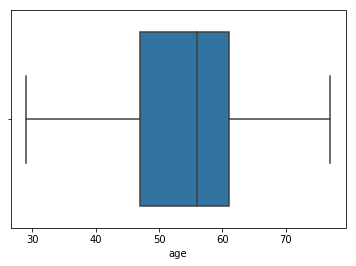

In [18]:
# age
sns.boxplot(df.age);

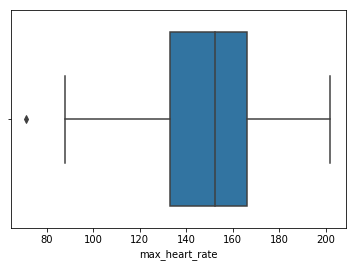

In [21]:
# max heart rate
sns.boxplot(df.max_heart_rate)

## Correlation matrices

---

A great way to easily get a feel for linear relationships between your variables is with a correlation matrix.

Below is the formula for the correlation between two variables $X$ and $Y$:

#### Correlation

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

#### The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using the `.corr()` method.

It's useful to get a feel for which columns are correlated. The `.corr() method` can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [22]:
# A:
df.corr()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,old_peak,slope,ca,has_heart_disease
age,1.000000,-0.094471,0.291517,0.200144,0.130069,0.150640,-0.399860,0.105350,0.193581,0.161608,0.358584,0.233030
sex,-0.094471,1.000000,-0.067347,-0.173120,0.032875,0.029912,-0.049927,0.137046,0.119853,0.030073,0.089553,0.277575
resting_blood_pressure,0.291517,-0.067347,1.000000,0.129044,0.184773,0.139721,-0.043997,0.061811,0.182143,0.111736,0.094889,0.149796
cholesterol,0.200144,-0.173120,0.129044,1.000000,0.022258,0.170143,-0.012242,0.075597,0.016893,-0.013046,0.109374,0.084361
fasting_blood_sugar,0.130069,0.032875,0.184773,0.022258,1.000000,0.059442,-0.003494,0.003052,0.019111,0.055218,0.176791,0.014809
resting_ecg,0.150640,0.029912,0.139721,0.170143,0.059442,1.000000,-0.058548,0.066933,0.104160,0.124097,0.133791,0.161405
max_heart_rate,-0.399860,-0.049927,-0.043997,-0.012242,-0.003494,-0.058548,1.000000,-0.377610,-0.351614,-0.385075,-0.277720,-0.427872
exercise_induced_angina,0.105350,0.137046,0.061811,0.075597,0.003052,0.066933,-0.377610,1.000000,0.294712,0.241546,0.158700,0.421805
old_peak,0.193581,0.119853,0.182143,0.016893,0.019111,0.104160,-0.351614,0.294712,1.000000,0.577109,0.272410,0.426353
slope,0.161608,0.030073,0.111736,-0.013046,0.055218,0.124097,-0.385075,0.241546,0.577109,1.000000,0.098937,0.334919


It can be difficult to spot any outliers simply by staring at our correlation matrix. To help get around this issue, let's use Seaborn's `.heatmap()` to give our correlation matrix some color.

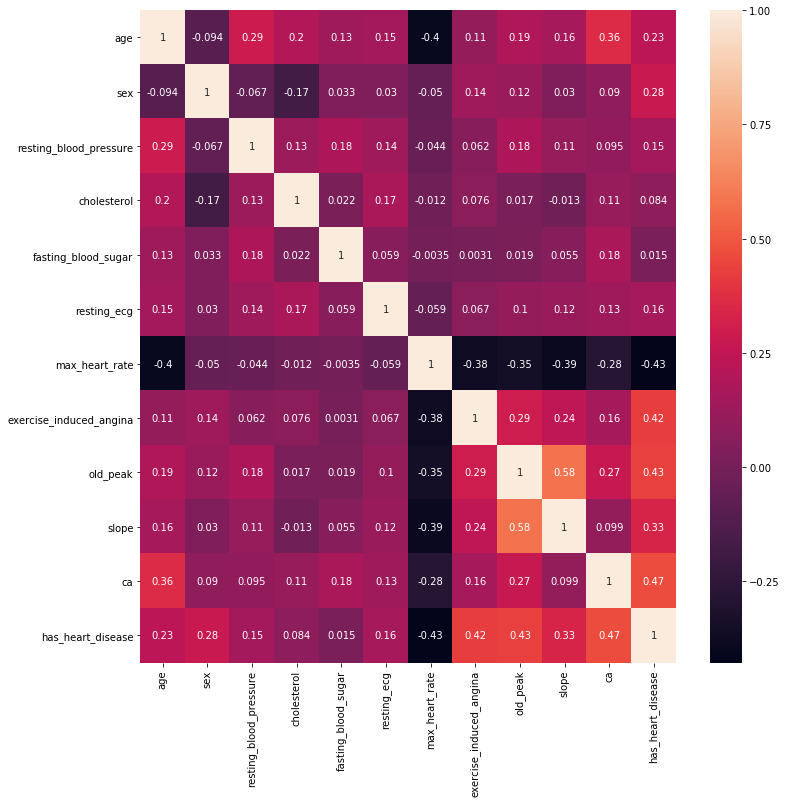

In [23]:
# A:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)